# US-Ignite Fed_Notebook

# Data from 2009-2016

In [9]:
#import libraries from Carto.
from cartoframes.auth import set_default_credentials
from cartoframes.viz import Map, Layer
import cartoframes
cartoframes.__version__
#from cartoframes.viz.helpers import color_continuous_layer
import pandas as pd
import geopandas as gpd
import requests
import json
from autocensus import Query #Library from Socrata to gather ACS Data
from cartoframes.data.services import Geocoding
#import censusdata
#set_default_credentials('creds_usignite.json')
set_default_credentials(
    base_url='https://usignite-admin.carto.com/',
    api_key='81c922dc336bd82103d92a768816a4567c444909'
)

from cartoframes.data.observatory import Catalog, Variable, Geography, Dataset

In [10]:
import numpy as np

from linearmodels import PanelOLS
from linearmodels import RandomEffects
import ipywidgets as widgets
from ipywidgets import Output, Tab
from IPython.display import clear_output
from cartoframes.data.services import Isolines
from cartoframes.data.observatory import Variable
from cartoframes.data.observatory import Enrichment
from cartoframes.data.observatory import Catalog

# EDA

In [11]:
import seaborn as sns

In [45]:
df_final=pd.read_csv("~/Downloads/Final_merged_age.csv")

In [46]:
df_final.head(100)

,Unnamed: 0,geo_id,centroid,year,geometry,pop,edut,collegemale,collegefemale,households,income,gini,total_p,zipcode,Empratio,estabratio,ratio_65,ratio_22_50,diffEmpratio,diffestabratio
0,318,6073015502,POINT (-116.8304254797509 32.81131603277056),2010,MULTIPOLYGON (((-116.8583888559341 32.81723278...,2433.0,1651.0,130.0,107.0,83.0,864.0,0.4400,2748,91901,0.176125,0.017613,0.345664,0.058775,0.000000,0.000000
1,2093,6073015502,POINT (-116.8304254797509 32.81131603277056),2011,MULTIPOLYGON (((-116.8583888559341 32.81723278...,2496.0,1717.0,124.0,114.0,95.0,896.0,0.4080,2748,91901,0.176125,0.017613,0.332131,0.079327,-0.117417,-0.011742
2,3868,6073015502,POINT (-116.8304254797509 32.81131603277056),2012,MULTIPOLYGON (((-116.8583888559341 32.81723278...,2529.0,1790.0,124.0,107.0,113.0,904.0,0.3790,2748,91901,0.293542,0.029354,0.345987,0.086200,0.117417,0.011742
3,5643,6073015502,POINT (-116.8304254797509 32.81131603277056),2013,MULTIPOLYGON (((-116.8583888559341 32.81723278...,2698.0,1900.0,141.0,148.0,136.0,903.0,0.3782,2748,91901,0.176125,0.017613,0.320979,0.143810,-0.058708,-0.005871
4,7418,6073015502,POINT (-116.8304645225708 32.81130364624261),2014,MULTIPOLYGON (((-116.8583888559341 32.81723278...,2699.0,1865.0,143.0,135.0,154.0,883.0,0.3837,2748,91901,0.234834,0.023483,0.309003,0.115969,-0.410959,0.005871
5,9193,6073015502,POINT (-116.830446134218 32.81131662191954),2015,MULTIPOLYGON (((-116.8583888559341 32.81723278...,2909.0,2005.0,126.0,152.0,170.0,949.0,0.3917,2748,91901,0.645793,0.017613,0.314197,0.114816,-0.058708,-0.005871
6,10968,6073015502,POINT (-116.8299969494062 32.81020076184434),2016,MULTIPOLYGON (((-116.8583888559341 32.81723278...,2849.0,2017.0,108.0,151.0,189.0,950.0,0.4479,2748,91901,0.704501,0.023483,0.316602,0.151281,-7.773008,-0.339838
7,1189,6073021202,POINT (-116.641978140868 32.8284525792826),2010,MULTIPOLYGON (((-116.7511618358752 32.79765279...,2828.0,1930.0,86.0,43.0,93.0,1098.0,0.3770,3156,91901,8.454012,0.845401,0.368105,0.050919,0.000000,0.000000
8,2964,6073021202,POINT (-116.641978140868 32.8284525792826),2011,MULTIPOLYGON (((-116.7511618358752 32.79765279...,3164.0,1991.0,87.0,94.0,113.0,1077.0,0.4565,3156,91901,8.454012,0.845401,0.343552,0.086283,-5.636008,-0.563601
9,4739,6073021202,POINT (-116.641978140868 32.8284525792826),2012,MULTIPOLYGON (((-116.7511618358752 32.79765279...,3252.0,2101.0,92.0,133.0,121.0,1076.0,0.4807,3156,91901,14.090020,1.409002,0.345941,0.109164,5.636008,0.563601


In [15]:
#data=df_final[['zipcode', 'geoid', 'NAICS2012', 'year', 'edut',
#       'collegemale', 'collegefemale','pop',
 #      'households', 'income', 'gini', 'total_p', 'ratio_65', 'Empratio',
 #      'estabratio']]

In [48]:
data=df_final[['zipcode', 'geo_id', 'year', 'edut',
       'collegemale', 'collegefemale','pop',
     'households', 'income', 'gini',  'Empratio',
    'estabratio','ratio_65','ratio_22_50','diffEmpratio','diffestabratio']]

In [120]:
data['total_college']=data['collegemale']+data['collegefemale']
data['college_ratio']=data['total_college']/data['edut']
data['college_ratio_pop']=data['total_college']/data['pop']

In [50]:
data['Empratio'][data['Empratio']!=0.0].sort_values()

951         0.023095
947         0.023095
945         0.023095
946         0.023095
1596        0.029354
1604        0.029354
1603        0.029354
1597        0.029354
1606        0.039139
1605        0.039139
1600        0.039139
1607        0.039139
1598        0.039139
1599        0.039139
12394       0.045767
950         0.046189
949         0.046189
1601        0.048924
1608        0.048924
9961        0.052493
1184        0.053520
7806        0.054517
7799        0.054517
7792        0.054517
798         0.055556
812         0.055556
5405        0.056215
5398        0.056215
1183        0.057637
1609        0.058708
            ...     
9629     2284.260171
9643     2284.260171
9636     2284.260171
10579    2388.360521
10572    2388.360521
10578    2461.143516
10571    2461.143516
10580    2531.230845
10573    2531.230845
10584    2562.511122
10591    2562.511122
11332    2804.252462
11339    2804.252462
11346    2804.252462
10570    2919.406822
10577    2919.406822
10609    3285

In [51]:
data['Empratio'].describe() 

count    12425.000000
mean        52.040267
std        229.514840
min          0.000000
25%          0.988701
50%          7.112824
75%         28.543850
max       5342.728621
Name: Empratio, dtype: float64

In [52]:
data['Empratio'].sort_values()

6212        0.000000
5351        0.000000
5352        0.000000
5353        0.000000
5354        0.000000
5355        0.000000
5356        0.000000
5350        0.000000
5357        0.000000
5359        0.000000
5360        0.000000
5361        0.000000
783         0.000000
782         0.000000
781         0.000000
5358        0.000000
780         0.000000
5349        0.000000
5186        0.000000
5172        0.000000
5173        0.000000
5174        0.000000
5175        0.000000
5176        0.000000
5177        0.000000
5348        0.000000
5178        0.000000
5180        0.000000
5181        0.000000
5182        0.000000
            ...     
9629     2284.260171
9643     2284.260171
9636     2284.260171
10579    2388.360521
10572    2388.360521
10578    2461.143516
10571    2461.143516
10573    2531.230845
10580    2531.230845
10584    2562.511122
10591    2562.511122
11346    2804.252462
11339    2804.252462
11332    2804.252462
10577    2919.406822
10570    2919.406822
10602    3285

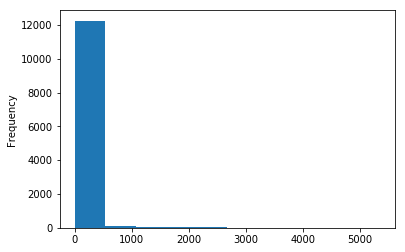

In [121]:
data['Empratio'].plot(kind ="hist")

In [122]:
data['estabratio'].describe() 

count    12425.000000
mean         1.772935
std          5.093477
min          0.000000
25%          0.052493
50%          0.383562
75%          1.378462
max         70.545724
Name: estabratio, dtype: float64

In [123]:
data['logesration']=np.log(data['estabratio'])

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


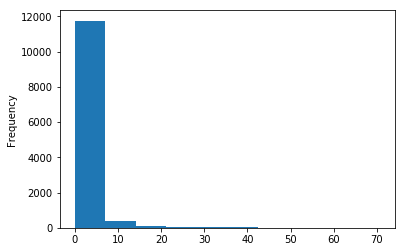

In [124]:
data['estabratio'].plot(kind ="hist")

In [125]:
loges=np.log(data['estabratio'])

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [126]:
data['gini'].describe() 

count    12303.000000
mean         0.408574
std          0.061484
min          0.012800
25%          0.368300
50%          0.404400
75%          0.446000
max          0.722600
Name: gini, dtype: float64

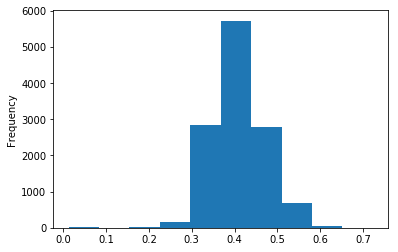

In [127]:
data['gini'].plot(kind ="hist") 

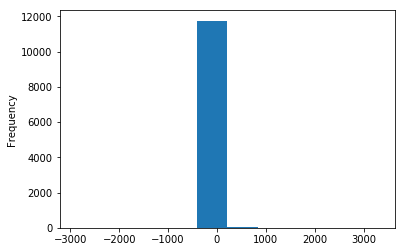

In [128]:
data['diffEmpratio'].plot(kind ="hist")

In [60]:
corr=data.corr().abs()

#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]


[Text(0.5, 0, 'zipcode'),
 Text(1.5, 0, 'geo_id'),
 Text(2.5, 0, 'year'),
 Text(3.5, 0, 'edut'),
 Text(4.5, 0, 'collegemale'),
 Text(5.5, 0, 'collegefemale'),
 Text(6.5, 0, 'pop'),
 Text(7.5, 0, 'households'),
 Text(8.5, 0, 'income'),
 Text(9.5, 0, 'gini'),
 Text(10.5, 0, 'Empratio'),
 Text(11.5, 0, 'estabratio'),
 Text(12.5, 0, 'ratio_65'),
 Text(13.5, 0, 'ratio_22_50'),
 Text(14.5, 0, 'diffEmpratio'),
 Text(15.5, 0, 'diffestabratio'),
 Text(16.5, 0, 'total_college'),
 Text(17.5, 0, 'college_ratio'),
 Text(18.5, 0, 'logesration')]

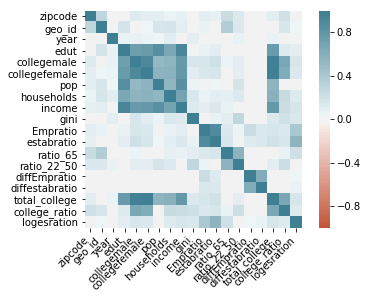

In [61]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# modeling 

In [129]:
df=data

In [130]:
df.columns

Index(['zipcode', 'geo_id', 'year', 'edut', 'collegemale', 'collegefemale',
       'pop', 'households', 'income', 'gini', 'Empratio', 'estabratio',
       'ratio_65', 'ratio_22_50', 'diffEmpratio', 'diffestabratio',
       'total_college', 'college_ratio', 'logesration', 'college_ratio_pop'],
      dtype='object')

In [131]:
df.head()

,zipcode,geo_id,year,edut,collegemale,collegefemale,pop,households,income,gini,Empratio,estabratio,ratio_65,ratio_22_50,diffEmpratio,diffestabratio,total_college,college_ratio,logesration,college_ratio_pop
0,91901,6073015502,2010,1651.0,130.0,107.0,2433.0,83.0,864.0,0.4400,0.176125,0.017613,0.345664,0.058775,0.000000,0.000000,237.0,0.143549,-4.039145,0.097411
1,91901,6073015502,2011,1717.0,124.0,114.0,2496.0,95.0,896.0,0.4080,0.176125,0.017613,0.332131,0.079327,-0.117417,-0.011742,238.0,0.138614,-4.039145,0.095353
2,91901,6073015502,2012,1790.0,124.0,107.0,2529.0,113.0,904.0,0.3790,0.293542,0.029354,0.345987,0.086200,0.117417,0.011742,231.0,0.129050,-3.528319,0.091340
3,91901,6073015502,2013,1900.0,141.0,148.0,2698.0,136.0,903.0,0.3782,0.176125,0.017613,0.320979,0.143810,-0.058708,-0.005871,289.0,0.152105,-4.039145,0.107116
4,91901,6073015502,2014,1865.0,143.0,135.0,2699.0,154.0,883.0,0.3837,0.234834,0.023483,0.309003,0.115969,-0.410959,0.005871,278.0,0.149062,-3.751463,0.103001


In [132]:
from linearmodels.panel import PooledOLS
import statsmodels.api as sm

In [133]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [134]:
df['year']=df['year'].dt.year

In [135]:
#add column year to index
df=df.set_index([ 'zipcode','year'])
#swap indexes




In [136]:
import statsmodels.formula.api as smf

In [137]:
df.columns

Index(['geo_id', 'edut', 'collegemale', 'collegefemale', 'pop', 'households',
       'income', 'gini', 'Empratio', 'estabratio', 'ratio_65', 'ratio_22_50',
       'diffEmpratio', 'diffestabratio', 'total_college', 'college_ratio',
       'logesration', 'college_ratio_pop'],
      dtype='object')

# modeling
use all the varaibles to predict establishment ratios 
1. pop: it's total population of the corresponding census tract(not prediction)
2. households: households of the corresponding census tract
3. income:income of the corresponding census tract
4. edut: total education popluation of the corresponding census tract
5. total_college:total college popluation of the corresponding census tract
6. college_ration:total college ratio
7. ratio_65:the ratio of population who are older than 65
8. ration_22_50:the ratio of populiation who are from 22 to 50
9. diffEmpratio:the difference of empolyee size ratio from last year at same census tract
10. diffestabratio: the difference of establishement ratio from last year at same census tract

In [138]:
FE_ols1 = smf.ols(formula= 'estabratio ~ 1 +pop+households+income+edut+total_college+college_ratio+ratio_65+ratio_22_50+diffEmpratio+diffestabratio+college_ratio_pop', data = df).fit()
print(FE_ols1.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     113.7
Date:                Wed, 18 Mar 2020   Prob (F-statistic):          4.98e-248
Time:                        09:51:30   Log-Likelihood:                -35292.
No. Observations:               11739   AIC:                         7.061e+04
Df Residuals:                   11727   BIC:                         7.070e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.1408      0.46

In [74]:
##due to the p value of college_ration is really large, the we drop college_ratio and young people ration

In [139]:
FE_ols2 = smf.ols(formula= 'estabratio ~ 1 +pop+households+income+edut+total_college+ratio_65+diffEmpratio+diffestabratio', data = df).fit()
print(FE_ols2.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     155.7
Date:                Wed, 18 Mar 2020   Prob (F-statistic):          2.14e-250
Time:                        09:51:55   Log-Likelihood:                -35341.
No. Observations:               11757   AIC:                         7.070e+04
Df Residuals:                   11748   BIC:                         7.077e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.8678      0.261    -11.

In [94]:
FE_olsfinal = smf.ols(formula= 'estabratio ~ 1 +pop+households+income+edut+total_college+ratio_65+diffEmpratio+diffestabratio', data = df).fit()
print(FE_olsfinal.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     156.5
Date:                Wed, 18 Mar 2020   Prob (F-statistic):          1.82e-251
Time:                        09:30:47   Log-Likelihood:                -35140.
No. Observations:               11681   AIC:                         7.030e+04
Df Residuals:                   11672   BIC:                         7.037e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.9738      0.264    -11.

In [ ]:
#+households

In [77]:
import numpy as np
import pandas as pd
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colormap
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [78]:
df.columns

Index(['geo_id', 'edut', 'collegemale', 'collegefemale', 'pop', 'households',
       'income', 'gini', 'Empratio', 'estabratio', 'ratio_65', 'ratio_22_50',
       'diffEmpratio', 'diffestabratio', 'total_college', 'college_ratio',
       'logesration'],
      dtype='object')

In [92]:

#year = pd.Categorical(year)

In [104]:
df['year'] = year

In [105]:
df['year']=df['year'].apply(lambda x: x.strftime('%Y') )

In [82]:
df.dropna(inplace=True)

In [83]:

exog_vars = ['pop','households','income','edut','total_college','ratio_65','diffEmpratio','diffestabratio']
exog = sm.add_constant(df[exog_vars])

In [84]:
df.isnull().values.any()
df.isnull().sum()

geo_id            0
edut              0
collegemale       0
collegefemale     0
pop               0
households        0
income            0
gini              0
Empratio          0
estabratio        0
ratio_65          0
ratio_22_50       0
diffEmpratio      0
diffestabratio    0
total_college     0
college_ratio     0
logesration       0
dtype: int64

In [85]:
from linearmodels.panel import RandomEffects
mod = RandomEffects(df.estabratio , exog)


In [86]:
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:             estabratio   R-squared:                        0.0686
Estimator:              RandomEffects   R-squared (Between):              0.0760
No. Observations:               11681   R-squared (Within):               0.0659
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0783
Time:                        09:28:14   Log-likelihood                -3.362e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      107.38
Entities:                          83   P-value                           0.0000
Avg Obs:                       140.73   Distribution:                 F(8,11672)
Min Obs:                       5.0000                                           
Max Obs:                       363.00   F-statistic (robust):             103.50
                            

In [88]:

exog_vars1 = ['pop','households','income','edut','total_college','ratio_65','diffEmpratio','diffestabratio']
exog1 = sm.add_constant(df[exog_vars1])

In [89]:
FE_olsfinal = smf.ols(formula= 'estabratio ~ 1 +pop+households+income+edut+total_college+ratio_65+diffEmpratio+diffestabratio', data = df).fit()
print(FE_olsfinal.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     156.5
Date:                Wed, 18 Mar 2020   Prob (F-statistic):          1.82e-251
Time:                        09:29:33   Log-Likelihood:                -35140.
No. Observations:               11681   AIC:                         7.030e+04
Df Residuals:                   11672   BIC:                         7.037e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.9738      0.264    -11.

In [90]:
mod2 = PanelOLS(df.estabratio, exog1, entity_effects=True, time_effects=True)
fe_te_res = mod2.fit()
print(fe_te_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:             estabratio   R-squared:                        0.0665
Estimator:                   PanelOLS   R-squared (Between):              0.0487
No. Observations:               11681   R-squared (Within):               0.0661
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0782
Time:                        09:29:41   Log-likelihood                -3.342e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      103.13
Entities:                          83   P-value                           0.0000
Avg Obs:                       140.73   Distribution:                 F(8,11584)
Min Obs:                       5.0000                                           
Max Obs:                       363.00   F-statistic (robust):             103.13
                            

In [91]:
from linearmodels.panel import compare
print(compare({'RE':re_res,'Pooled':fe_te_res}))

                    Model Comparison                    
                                       RE         Pooled
--------------------------------------------------------
Dep. Variable                  estabratio     estabratio
Estimator                   RandomEffects       PanelOLS
No. Observations                    11681          11681
Cov. Est.                      Unadjusted     Unadjusted
R-squared                          0.0686         0.0665
R-Squared (Within)                 0.0659         0.0661
R-Squared (Between)                0.0760         0.0487
R-Squared (Overall)                0.0783         0.0782
F-statistic                        107.38         103.13
P-value (F-stat)                   0.0000         0.0000
=====================     ===============   ============
const                             -2.2777        -2.5123
                                (-7.0736)      (-9.5454)
pop                               -0.0004        -0.0004
                               

In [95]:
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colormap
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [96]:
df_final=df_final.dropna()

In [97]:
df_final['Empratio'][df_final['Empratio']!=0.0].sort_values()
df_final['total_college']=df_final['collegemale']+df_final['collegefemale']
df_final['college_ratio']=df_final['total_college']/df_final['edut']

In [98]:
from shapely import wkt

df_final['geometry'] = df_final['geometry'].apply(wkt.loads)
df_final['centroid'] = df_final['centroid'].apply(wkt.loads)

In [99]:
dfshp = gp.GeoDataFrame(df_final, geometry='geometry')

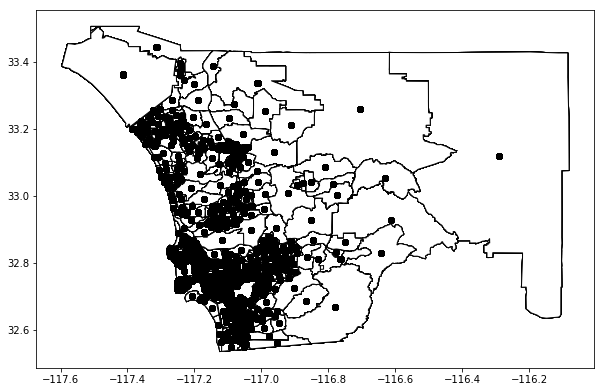

In [100]:

fig, ax = plt.subplots(figsize = (10, 10))
dfshp.plot(ax=ax, **{'edgecolor': 'black', 'facecolor': 'white'})
dfshp.centroid.plot(ax = ax, c = 'black')
plt.savefig('sd_shp')
plt.show()

In [101]:
dfshp.head()

,Unnamed: 0,geo_id,centroid,year,geometry,pop,edut,collegemale,collegefemale,households,...,total_p,zipcode,Empratio,estabratio,ratio_65,ratio_22_50,diffEmpratio,diffestabratio,total_college,college_ratio
0,318,6073015502,POINT (-116.8304254797509 32.81131603277056),2010,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547...",2433.0,1651.0,130.0,107.0,83.0,...,2748,91901,0.176125,0.017613,0.345664,0.058775,0.000000,0.000000,237.0,0.143549
1,2093,6073015502,POINT (-116.8304254797509 32.81131603277056),2011,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547...",2496.0,1717.0,124.0,114.0,95.0,...,2748,91901,0.176125,0.017613,0.332131,0.079327,-0.117417,-0.011742,238.0,0.138614
2,3868,6073015502,POINT (-116.8304254797509 32.81131603277056),2012,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547...",2529.0,1790.0,124.0,107.0,113.0,...,2748,91901,0.293542,0.029354,0.345987,0.086200,0.117417,0.011742,231.0,0.129050
3,5643,6073015502,POINT (-116.8304254797509 32.81131603277056),2013,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547...",2698.0,1900.0,141.0,148.0,136.0,...,2748,91901,0.176125,0.017613,0.320979,0.143810,-0.058708,-0.005871,289.0,0.152105
4,7418,6073015502,POINT (-116.8304645225708 32.81130364624261),2014,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547...",2699.0,1865.0,143.0,135.0,154.0,...,2748,91901,0.234834,0.023483,0.309003,0.115969,-0.410959,0.005871,278.0,0.149062


In [104]:
g_y=dfshp['estabratio'].values.reshape((-1, 1))

In [105]:
g_X =dfshp[['pop','households','income','edut','total_college','ratio_65','diffEmpratio','diffestabratio']].values

In [106]:
def getXY(pt):
    return (pt.x, pt.y)
x,y = [list(t) for t in zip(*map(getXY, dfshp['centroid']))]

In [107]:
g_coords = g_coords = list(zip(x, y))

In [108]:
gwr_selector = Sel_BW(g_coords, g_y, g_X)

In [109]:
gwr_bw = gwr_selector.search()

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.329556e-26
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.625962e-26
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.329777e-19
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.395732e-19
  xtx

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.487151e-26
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.955830e-26
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.070129e-25
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.438843e-25
  xtx

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.600320e-27
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.492249e-26
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.727522e-27
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.057750e-25
  xtx

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.059571e-26
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.283198e-25
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.252570e-26
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.269781e-25
  xtx

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.080007e-25
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.687939e-26
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.009704e-25
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.974765e-26
  xtx

In [110]:
gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)

In [111]:
gwr_results = gwr_model.fit()

In [112]:
print(gwr_results.resid_ss)

96242.6856514918


In [113]:
bws = (x for x in range(25, 175, 25))

In [114]:
print(gwr_results.aic)
print(gwr_results.aicc)
print(gwr_results.R2)

59968.146887072326
60193.76075272891
0.6901805550802854


In [115]:
len(dfshp)

11681

In [116]:
s=abs(gwr_results.localR2)

In [140]:
gwr_results.localR2

array([[0.64935645],
       [0.64935645],
       [0.64935645],
       ...,
       [0.0506508 ],
       [0.04491415],
       [0.04489866]])

In [144]:
dfshp['R2'] =gwr_results.localR2

In [153]:
dfshp['R2']=abs(dfshp['R2'])

In [154]:
dfshp2=dfshp[dfshp['R2']<=1]

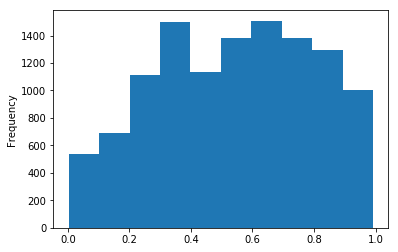

In [156]:
dfshp2['R2'].plot(kind ="hist")

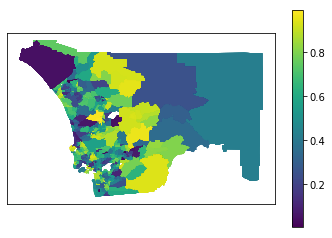

In [157]:
#Local model fit
#dfshp2['R2'] =abs(gwr_results.localR2)
dfshp2.plot('R2', legend = True)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('local_R2')
plt.show()

In [ ]:
#92140-92199

In [ ]:
##city
#'92101', '92102', '92103', '92104', '92105', '92106', '92107', '92108', '92109', '92110', '92111', '92113', '92114', '92115', '92116', '92117', '92118', '92119', '92120', '92121', '92122', '92123', '92124', '92126', '92127', '92128', '92129', '92130', '92131', '92132', '92134', '92135', '92139', '92140', '92145', '92147', '92154', '92155', '92173'

In [158]:
citylist=['92101', '92102', '92103', '92104', '92105', '92106', '92107', '92108', '92109', '92110', '92111', '92113', '92114', '92115', '92116', '92117', '92118', '92119', '92120', '92121', '92122', '92123', '92124', '92126', '92127', '92128', '92129', '92130', '92131', '92132', '92134', '92135', '92139', '92140', '92145', '92147', '92154', '92155', '92173']

In [161]:
#df_finalcity=df_final[df_final['zipcode'] in citylist]